<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(1_6)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.6_n250.csv',
 'data_multi_delta_1.6_n120.csv',
 'data_multi_delta_1.6_n60.csv',
 'data_multi_delta_1.6_n30.csv',
 'data_multi_delta_1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,57.728327,41.637520,92.428552,93.923526,-3.183904,292.534022,292.861151,-0.327130
1,0.0,1.0,30.351352,85.683501,82.899089,20.227514,75.914414,305.075869,244.445550,60.630319
2,0.0,2.0,35.778001,55.880104,42.719332,79.146467,-3.227023,220.296880,217.864841,2.432039
3,0.0,3.0,53.147216,95.898995,88.802938,37.553218,0.254358,285.656725,301.783443,-16.126718
4,0.0,4.0,66.392438,61.163319,33.846309,84.155224,-18.097104,237.460185,248.033517,-10.573331
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,43.561347,62.422904,69.802088,83.221733,13.550991,282.559063,277.608237,4.950826
59996,999.0,56.0,29.242024,42.513439,56.437454,86.019106,-4.437232,219.774791,230.130743,-10.355951
59997,999.0,57.0,92.470015,93.626469,74.653078,68.414847,61.571616,400.736026,349.326093,51.409933
59998,999.0,58.0,36.984104,49.400336,39.054943,40.326239,-20.649034,155.116588,178.827429,-23.710840


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,57.728327,41.637520,92.428552,93.923526,-3.183904,292.534022,292.861151,-0.327130
1,0.0,1.0,30.351352,85.683501,82.899089,20.227514,75.914414,305.075869,244.445550,60.630319
2,0.0,2.0,35.778001,55.880104,42.719332,79.146467,-3.227023,220.296880,217.864841,2.432039
3,0.0,3.0,53.147216,95.898995,88.802938,37.553218,0.254358,285.656725,301.783443,-16.126718
4,0.0,4.0,66.392438,61.163319,33.846309,84.155224,-18.097104,237.460185,248.033517,-10.573331
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,43.561347,62.422904,69.802088,83.221733,13.550991,282.559063,277.608237,4.950826
59996,999.0,56.0,29.242024,42.513439,56.437454,86.019106,-4.437232,219.774791,230.130743,-10.355951
59997,999.0,57.0,92.470015,93.626469,74.653078,68.414847,61.571616,400.736026,349.326093,51.409933
59998,999.0,58.0,36.984104,49.400336,39.054943,40.326239,-20.649034,155.116588,178.827429,-23.710840


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    57.728327  41.637520  92.428552  93.923526  -3.183904   
      1.0    30.351352  85.683501  82.899089  20.227514  75.914414   
      2.0    35.778001  55.880104  42.719332  79.146467  -3.227023   
      3.0    53.147216  95.898995  88.802938  37.553218   0.254358   
      4.0    66.392438  61.163319  33.846309  84.155224 -18.097104   
...                ...        ...        ...        ...        ...   
999.0 55.0   43.561347  62.422904  69.802088  83.221733  13.550991   
      56.0   29.242024  42.513439  56.437454  86.019106  -4.437232   
      57.0   92.470015  93.626469  74.653078  68.414847  61.571616   
      58.0   36.984104  49.400336  39.054943  40.326239 -20.649034   
      59.0   34.815171  74.001747  48.031346  31.757860  66.189158   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    292.534022  292.861151  -0.327130  
      1.0    305.075869  244.445550  60.630319  
      2.0    220.296880  217.864841   2.432039  
      3.0    285.656725  301.783443 -16.126718  
      4.0    237.460185  248.033517 -10.573331  
...                 ...         ...        ...  
999.0 55.0   282.559063  277.608237   4.950826  
      56.0   219.774791  230.130743 -10.355951  
      57.0   400.736026  349.326093  51.409933  
      58.0   155.116588  178.827429 -23.710840  
      59.0   264.795283  206.803934  57.991348  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    57.728327  41.637520  92.428552  93.923526  -3.183904   
      1.0    30.351352  85.683501  82.899089  20.227514  75.914414   
      2.0    35.778001  55.880104  42.719332  79.146467  -3.227023   
      3.0    53.147216  95.898995  88.802938  37.553218   0.254358   
      4.0    66.392438  61.163319  33.846309  84.155224 -18.097104   
...                ...        ...        ...        ...        ...   
999.0 55.0   43.561347  62.422904  69.802088  83.221733  13.550991   
      56.0   29.242024  42.513439  56.437454  86.019106  -4.437232   
      57.0   92.470015  93.626469  74.653078  68.414847  61.571616   
      58.0   36.984104  49.400336  39.054943  40.326239 -20.649034   
      59.0   34.815171  74.001747  48.031346  31.757860  66.189158   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    292.534022  292.861151  -0.327130  
      1.0    305.075869  244.445550  60.630319  
      2.0    220.296880  217.864841   2.432039  
      3.0    285.656725  301.783443 -16.126718  
      4.0    237.460185  248.033517 -10.573331  
...                 ...         ...        ...  
999.0 55.0   282.559063  277.608237   4.950826  
      56.0   219.774791  230.130743 -10.355951  
      57.0   400.736026  349.326093  51.409933  
      58.0   155.116588  178.827429 -23.710840  
      59.0   264.795283  206.803934  57.991348  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,57.728327,41.637520,92.428552,93.923526,-3.183904,292.534022,292.861151,-0.327130
1,0.0,1.0,30.351352,85.683501,82.899089,20.227514,75.914414,305.075869,244.445550,60.630319
2,0.0,2.0,35.778001,55.880104,42.719332,79.146467,-3.227023,220.296880,217.864841,2.432039
3,0.0,3.0,53.147216,95.898995,88.802938,37.553218,0.254358,285.656725,301.783443,-16.126718
4,0.0,4.0,66.392438,61.163319,33.846309,84.155224,-18.097104,237.460185,248.033517,-10.573331
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,43.561347,62.422904,69.802088,83.221733,13.550991,282.559063,277.608237,4.950826
59996,999.0,56.0,29.242024,42.513439,56.437454,86.019106,-4.437232,219.774791,230.130743,-10.355951
59997,999.0,57.0,92.470015,93.626469,74.653078,68.414847,61.571616,400.736026,349.326093,51.409933
59998,999.0,58.0,36.984104,49.400336,39.054943,40.326239,-20.649034,155.116588,178.827429,-23.710840


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    57.728327  41.637520  92.428552  93.923526  -3.183904   
      1.0    30.351352  85.683501  82.899089  20.227514  75.914414   
      2.0    35.778001  55.880104  42.719332  79.146467  -3.227023   
      3.0    53.147216  95.898995  88.802938  37.553218   0.254358   
      4.0    66.392438  61.163319  33.846309  84.155224 -18.097104   
...                ...        ...        ...        ...        ...   
999.0 55.0   43.561347  62.422904  69.802088  83.221733  13.550991   
      56.0   29.242024  42.513439  56.437454  86.019106  -4.437232   
      57.0   92.470015  93.626469  74.653078  68.414847  61.571616   
      58.0   36.984104  49.400336  39.054943  40.326239 -20.649034   
      59.0   34.815171  74.001747  48.031346  31.757860  66.189158   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    292.534022  292.861151  -0.327130  
      1.0    305.075869  244.445550  60.630319  
      2.0    220.296880  217.864841   2.432039  
      3.0    285.656725  301.783443 -16.126718  
      4.0    237.460185  248.033517 -10.573331  
...                 ...         ...        ...  
999.0 55.0   282.559063  277.608237   4.950826  
      56.0   219.774791  230.130743 -10.355951  
      57.0   400.736026  349.326093  51.409933  
      58.0   155.116588  178.827429 -23.710840  
      59.0   264.795283  206.803934  57.991348  

[60000 rows x 8 columns]

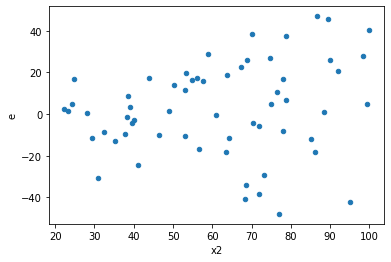

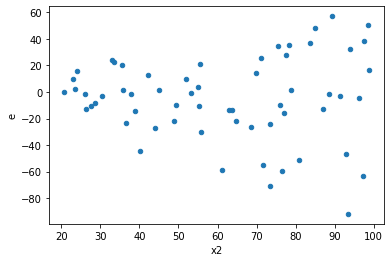

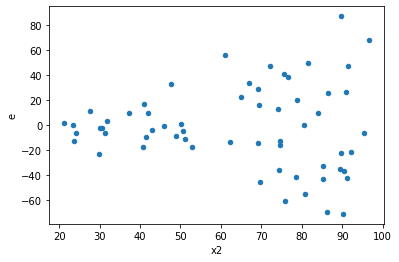

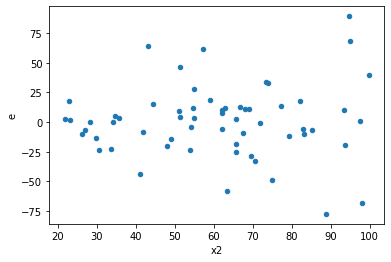

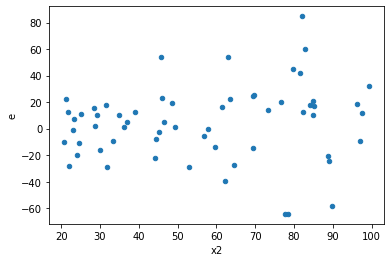

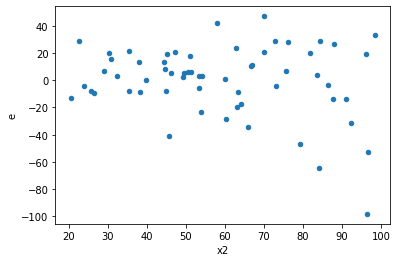

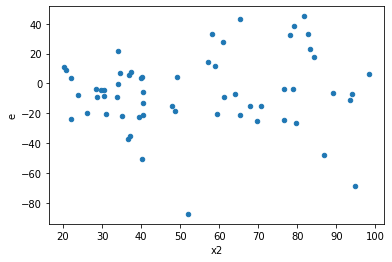

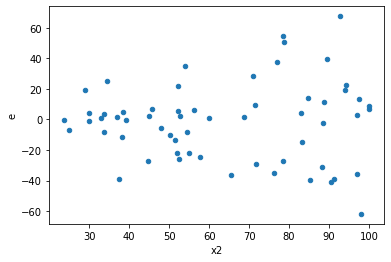

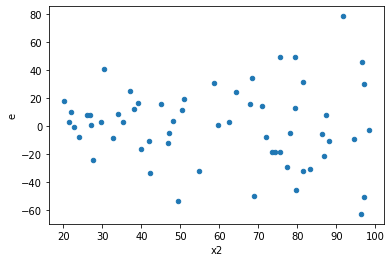

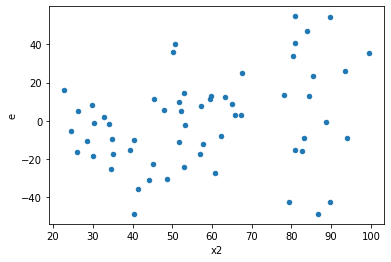

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,20.0,20.0,13056.922306413355,19017.996670524157,652.8461153206678,950.8998335262079,1.4565451355395456,0.40762871347217144,0.7961856432639143,0.20381435673608572,Reject005=1 : Homoscedasticity
1.0,20.0,20.0,9643.641874399782,14280.995596108292,482.1820937199891,714.0497798054146,1.4808716232006631,0.38741088726727724,0.8062945563663614,0.19370544363363862,Reject005=1 : Homoscedasticity
2.0,20.0,20.0,8229.752906584641,8637.989021788651,411.48764532923207,431.89945108943255,1.04960490549812,0.914862606006186,0.542568696996907,0.457431303003093,Reject005=1 : Homoscedasticity
3.0,20.0,20.0,6913.051005671794,18370.494137489946,345.6525502835897,918.5247068744973,2.657364182966092,0.034176214845356157,0.9829118925773219,0.017088107422678078,Reject005=0 : Heteroscedasticity
4.0,20.0,20.0,14825.183101323926,34505.68851841283,741.2591550661963,1725.2844259206418,2.3275050488470117,0.06588130152299287,0.9670593492385036,0.03294065076149644,Reject005=1 : Homoscedasticity
5.0,20.0,20.0,4646.3328037187675,26053.954901955447,232.31664018593838,1302.6977450977724,5.607423316965747,0.0003098888773900299,0.999845055561305,0.00015494443869501495,Reject005=0 : Heteroscedasticity
6.0,20.0,20.0,8379.566770421596,21630.745079446922,418.97833852107976,1081.5372539723462,2.5813679480184666,0.039658795542183434,0.9801706022289083,0.019829397771091717,Reject005=0 : Heteroscedasticity
8.0,20.0,20.0,6152.946080294209,21233.5285259915,307.64730401471047,1061.676426299575,3.45095312861513,0.00791360763648119,0.9960431961817594,0.003956803818240595,Reject005=0 : Heteroscedasticity
9.0,20.0,20.0,8228.79383816113,12979.942574174973,411.4396919080565,648.9971287087486,1.577380941782784,0.316238058890568,0.841880970554716,0.158119029445284,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,13056.922306413355,19017.996670524157,652.8461153206678,950.8998335262079,1.4565451355395456,0.40762871347217144,Reject005=1 : Homoscedasticity
1.0,20.0,20.0,9643.641874399782,14280.995596108292,482.1820937199891,714.0497798054146,1.4808716232006631,0.38741088726727724,Reject005=1 : Homoscedasticity
2.0,20.0,20.0,8229.752906584641,8637.989021788651,411.48764532923207,431.89945108943255,1.04960490549812,0.914862606006186,Reject005=1 : Homoscedasticity
3.0,20.0,20.0,6913.051005671794,18370.494137489946,345.6525502835897,918.5247068744973,2.657364182966092,0.034176214845356157,Reject005=0 : Heteroscedasticity
4.0,20.0,20.0,14825.183101323926,34505.68851841283,741.2591550661963,1725.2844259206418,2.3275050488470117,0.06588130152299287,Reject005=1 : Homoscedasticity
5.0,20.0,20.0,4646.3328037187675,26053.954901955447,232.31664018593838,1302.6977450977724,5.607423316965747,0.0003098888773900299,Reject005=0 : Heteroscedasticity
6.0,20.0,20.0,8379.566770421596,21630.745079446922,418.97833852107976,1081.5372539723462,2.5813679480184666,0.039658795542183434,Reject005=0 : Heteroscedasticity
7.0,20.0,20.0,11942.030210343502,6886.513040176139,597.1015105171751,344.32565200880697,0.5766618337819508,0.22696329334382404,Reject005=1 : Homoscedasticity
8.0,20.0,20.0,6152.946080294209,21233.5285259915,307.64730401471047,1061.676426299575,3.45095312861513,0.00791360763648119,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      716
Reject005=0 : Heteroscedasticity    284
Name: Result_test, dtype: int64